In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [43]:
k = 0.23e3
cp = 897 
ro = 2.7e3
alfa = k/(ro*cp)
deltat = 1e-3 # s
deltax = 0.04 # m
deltay = 0.04 # m
Lx = 0.4 # m
Ly = 0.4 # m
tmax = 10 # s
erro = 2.8039e-04
f0 = alfa*deltat/(deltax**2)

In [44]:
x = np.linspace(0, Lx, int(Lx/deltax)+1)
y = np.linspace(0, Ly, int(Ly/deltay)+1)
t = np.linspace(0, tmax, int(tmax/deltat)+1)
print(t)

[0.000e+00 1.000e-03 2.000e-03 ... 9.998e+00 9.999e+00 1.000e+01]


In [45]:
listatempo = []
for _ in range(len(t)):
    matrix = np.zeros((len(y),len(x)))
    listatempo.append(matrix)

In [46]:
for m,matrix in enumerate(listatempo):
    for i,linha in enumerate(matrix):
        for j,elem in enumerate(linha):
            if(i == 0):
                listatempo[m][i][j] = 150
            if(j==len(x)-1):
                listatempo[m][i][j] = 50


In [47]:
vx = int(Lx/deltax)
vy = int(Ly/deltay)

over = False
copia = listatempo.copy()
for m,matrix in enumerate(copia):
    
    for i,linha in enumerate(matrix):
        for j,elem in enumerate(linha):
            if(i != 0 and i != vx and j != vy and m != len(t)-1):
                if(j != 0) :
                    Tx = copia[m][i+1][j] - 2*copia[m][i][j] + copia[m][i-1][j]
                    Ty = copia[m][i][j+1] - 2*copia[m][i][j] + copia[m][i][j-1]
                    copia[m+1][i][j] = alfa*deltat*((Tx/(deltax**2))+(Ty/(deltay**2))) + copia[m][i][j]
                elif(j==0):
                    copia[m+1][i][j]=f0*(2*copia[m][i][j+1]+copia[m][i+1][j]+copia[m][i-1][j])+(1-4*f0)*copia[m][i][j]
        
    if (m>=0):
        ant=copia[m-1]
        list_errors=abs((matrix-ant)/matrix)
        
        if np.max(list_errors)<erro:
            break
    
print("acabou")
for matrix in copia:
    print(matrix)


<ipython-input-47-2240dc9334cc>:20: RuntimeWarning: invalid value encountered in true_divide
  list_errors=abs((matrix-ant)/matrix)


acabou
[[150. 150. 150. 150.  50.]
 [  0.   0.   0.   0.  50.]
 [  0.   0.   0.   0.  50.]
 [  0.   0.   0.   0.  50.]
 [  0.   0.   0.   0.  50.]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.42450142e-03 1.42450142e-03 1.42450142e-03 1.89933523e-03
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.74833808e-04
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.74833808e-04
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [2.84897579e-03 2.84897579e-03 2.84898030e-03 3.79861635e-03
  5.00000000e+01]
 [1.35280287e-08 1.35280287e-08 1.80373716e-08 9.49672126e-04
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 4.50934291e-09 9.49654088e-04
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.5

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [2.61653402e-01 2.61653445e-01 2.61728928e-01 3.48568572e-01
  5.00000000e+01]
 [2.27233843e-04 2.27277433e-04 3.02978127e-04 8.74446858e-02
  5.00000000e+01]
 [1.30918150e-07 1.74451472e-07 7.57883411e-05 8.71422738e-02
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [2.63072936e-01 2.63072980e-01 2.63149286e-01 3.50457983e-01
  5.00000000e+01]
 [2.29714367e-04 2.29758674e-04 3.06285485e-04 8.79203386e-02
  5.00000000e+01]
 [1.33074457e-07 1.77324206e-07 7.66159030e-05 8.76146285e-02
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [2.64492443e-01 2.64492487e-01 2.64569620e-01 3.52347339e-01
  5.00000000e+01]
 [2.32208325e-04 2.

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [6.75015430e-01 6.75016183e-01 6.75518378e-01 8.97999694e-01
  5.00000000e+01]
 [1.52020235e-03 1.52096041e-03 2.02692146e-03 2.26519287e-01
  5.00000000e+01]
 [2.28103943e-06 3.03657187e-06 5.07498411e-04 2.24502195e-01
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [6.76427125e-01 6.76427883e-01 6.76932177e-01 8.99873484e-01
  5.00000000e+01]
 [1.52658392e-03 1.52734676e-03 2.03543009e-03 2.26996196e-01
  5.00000000e+01]
 [2.29544733e-06 3.05574180e-06 5.09630435e-04 2.24970656e-01
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [6.77838794e-01 6.77839556e-01 6.78345953e-01 9.01747220e-01
  5.00000000e+01]
 [1.53297877e-03 1.

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.09030805e+00 1.09031123e+00 1.09161761e+00 1.44846737e+00
  5.00000000e+01]
 [3.97675158e-03 3.97996263e-03 5.30223237e-03 3.67387121e-01
  5.00000000e+01]
 [9.68062183e-06 1.28744278e-05 1.32883777e-03 3.62126455e-01
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.09171188e+00 1.09171507e+00 1.09302481e+00 1.45032554e+00
  5.00000000e+01]
 [3.98703050e-03 3.99025402e-03 5.31593707e-03 3.67865244e-01
  5.00000000e+01]
 [9.71826455e-06 1.29244466e-05 1.33227677e-03 3.62591035e-01
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.09311569e+00 1.09311889e+00 1.09443198e+00 1.45218366e+00
  5.00000000e+01]
 [3.99732256e-03 4.

[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.47396620e+00 1.47397405e+00 1.47635410e+00 1.95564136e+00
  5.00000000e+01]
 [7.28282443e-03 7.29078598e-03 9.71008630e-03 4.98541334e-01
  5.00000000e+01]
 [2.40450891e-05 3.19490054e-05 2.43571379e-03 4.88934155e-01
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.47536278e+00 1.47537065e+00 1.47775518e+00 1.95748516e+00
  5.00000000e+01]
 [7.29668427e-03 7.30466857e-03 9.72856476e-03 4.99020537e-01
  5.00000000e+01]
 [2.41139451e-05 3.20403895e-05 2.44035703e-03 4.89395174e-01
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.47675933e+00 1.47676722e+00 1.47915624e+00 1.95932891e+00
  5.00000000e+01]
 [7.31055710e-03 7.31856419e-03 9.7470

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.88898034e+00 1.88899684e+00 1.89289193e+00 2.50279289e+00
  5.00000000e+01]
 [1.19862153e-02 1.20030292e-02 1.59806812e-02 6.41512173e-01
  5.00000000e+01]
 [5.08796629e-05 6.75381502e-05 4.01261009e-03 6.25748477e-01
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.89036907e+00 1.89038561e+00 1.89428639e+00 2.50462122e+00
  5.00000000e+01]
 [1.20039275e-02 1.20207787e-02 1.60042947e-02 6.41992500e-01
  5.00000000e+01]
 [5.09928421e-05 6.76881632e-05 4.01855260e-03 6.26205672e-01
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.89175778e+00 1.89177436e+00 1.89568082e+00 2.50644950e+00
  5.00000000e+01]
 [1.20216525e-02 1.

[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [2.26851631e+00 2.26854486e+00 2.27414364e+00 3.00182988e+00
  5.00000000e+01]
 [1.73184367e-02 1.73476408e-02 2.30892864e-02 7.73257639e-01
  5.00000000e+01]
 [8.85328615e-05 1.17413960e-04 5.80283405e-03 7.50544696e-01
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [2.26989789e+00 2.26992649e+00 2.27553203e+00 3.00364413e+00
  5.00000000e+01]
 [1.73396525e-02 1.73689103e-02 2.31175694e-02 7.73738953e-01
  5.00000000e+01]
 [8.86961961e-05 1.17630193e-04 5.80996169e-03 7.50998418e-01
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [2.27127944e+00 2.27130810e+00 2.27692039e+00 3.00545832e+00
  5.00000000e+01]
 [1.73608810e-02 1.73901926e-02 2.3145

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [2.70105593e+00 2.70110407e+00 2.70901069e+00 3.56899794e+00
  5.00000000e+01]
 [2.46028048e-02 2.46522541e-02 3.27997758e-02 9.24560633e-01
  5.00000000e+01]
 [1.50219502e-04 1.99020265e-04 8.25203707e-03 8.92397065e-01
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [2.70242936e+00 2.70247757e+00 2.71039214e+00 3.57079621e+00
  5.00000000e+01]
 [2.46279909e-02 2.46775162e-02 3.28333492e-02 9.25043026e-01
  5.00000000e+01]
 [1.50451220e-04 1.99326613e-04 8.26051178e-03 8.92846859e-01
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [2.70380277e+00 2.70385106e+00 2.71177357e+00 3.57259443e+00
  5.00000000e+01]
 [2.46531896e-02 2.

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [3.07504583e+00 3.07511678e+00 3.08532973e+00 4.05805179e+00
  5.00000000e+01]
 [3.19436475e-02 3.20168015e-02 4.25848434e-02 1.05637609e+00
  5.00000000e+01]
 [2.22636988e-04 2.94702670e-04 1.07238263e-02 1.01473113e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [3.07641223e+00 3.07648328e+00 3.08670517e+00 4.05983631e+00
  5.00000000e+01]
 [3.19722470e-02 3.20454992e-02 4.26229641e-02 1.05685937e+00
  5.00000000e+01]
 [2.22937487e-04 2.95099484e-04 1.07334627e-02 1.01517755e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [3.07777861e+00 3.07784975e+00 3.08808059e+00 4.06162078e+00
  5.00000000e+01]
 [3.20008589e-02 3.

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [3.48245829e+00 3.48256120e+00 3.49561075e+00 4.58939595e+00
  5.00000000e+01]
 [4.10469204e-02 4.11534666e-02 5.47181795e-02 1.20101785e+00
  5.00000000e+01]
 [3.24916971e-04 4.29675366e-04 1.37934655e-02 1.14766654e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [3.48381704e+00 3.48392007e+00 3.49697964e+00 4.59116555e+00
  5.00000000e+01]
 [4.10792177e-02 4.11858896e-02 5.47612252e-02 1.20150206e+00
  5.00000000e+01]
 [3.25302599e-04 4.30183943e-04 1.38043643e-02 1.14810932e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [3.48517576e+00 3.48527891e+00 3.49834851e+00 4.59293511e+00
  5.00000000e+01]
 [4.11115273e-02 4.

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [3.83622855e+00 3.83636596e+00 3.85214971e+00 5.04958324e+00
  5.00000000e+01]
 [4.98923420e-02 5.00351048e-02 6.65067920e-02 1.32749870e+00
  5.00000000e+01]
 [4.36132809e-04 5.76266193e-04 1.67803657e-02 1.26282106e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [3.83758066e+00 3.83771822e+00 3.85351290e+00 5.05133995e+00
  5.00000000e+01]
 [4.99278326e-02 5.00707477e-02 6.65540896e-02 1.32798368e+00
  5.00000000e+01]
 [4.36600998e-04 5.76882969e-04 1.67923579e-02 1.26326069e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [3.83893275e+00 3.83907045e+00 3.85487607e+00 5.05309660e+00
  5.00000000e+01]
 [4.99633355e-02 5.

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [4.13847049e+00 4.13864283e+00 4.15695997e+00 5.44186054e+00
  5.00000000e+01]
 [5.81454409e-02 5.83250312e-02 7.75050650e-02 1.43620637e+00
  5.00000000e+01]
 [5.49478658e-04 7.25511706e-04 1.95706785e-02 1.36099982e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [4.13981694e+00 4.13998945e+00 4.15831828e+00 5.44360628e+00
  5.00000000e+01]
 [5.81836469e-02 5.83634141e-02 7.75559770e-02 1.43669199e+00
  5.00000000e+01]
 [5.50023754e-04 7.26229115e-04 1.95836030e-02 1.36143678e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [4.14116337e+00 4.14133604e+00 4.15967657e+00 5.44535196e+00
  5.00000000e+01]
 [5.82218649e-02 5.

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [4.39518639e+00 4.39539264e+00 4.41600313e+00 5.77441199e+00
  5.00000000e+01]
 [6.56612569e-02 6.58767436e-02 8.75200360e-02 1.52900891e+00
  5.00000000e+01]
 [6.60172322e-04 8.71137823e-04 2.21144085e-02 1.44424430e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [4.39652804e+00 4.39673448e+00 4.41735729e+00 5.77614843e+00
  5.00000000e+01]
 [6.57017598e-02 6.59174457e-02 8.75740049e-02 1.52949505e+00
  5.00000000e+01]
 [6.60787354e-04 8.71946624e-04 2.21281234e-02 1.44467900e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [4.39786966e+00 4.39807629e+00 4.41871143e+00 5.77788483e+00
  5.00000000e+01]
 [6.57422746e-02 6.

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [4.68573723e+00 4.68598691e+00 4.70934843e+00 6.15008644e+00
  5.00000000e+01]
 [7.47304139e-02 7.49920130e-02 9.96038721e-02 1.63456204e+00
  5.00000000e+01]
 [8.02643433e-04 1.05840847e-03 2.51870819e-02 1.53829979e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [4.68707345e+00 4.68732334e+00 4.71069789e+00 6.15181240e+00
  5.00000000e+01]
 [7.47735060e-02 7.50353312e-02 9.96612859e-02 1.63504874e+00
  5.00000000e+01]
 [8.03342737e-04 1.05932725e-03 2.52016898e-02 1.53873195e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [4.68840964e+00 4.68865974e+00 4.71204733e+00 6.15353831e+00
  5.00000000e+01]
 [7.48166100e-02 7.

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [5.04959978e+00 5.04991185e+00 5.07694910e+00 6.61949214e+00
  5.00000000e+01]
 [8.69341988e-02 8.72623570e-02 1.15862605e-01 1.76752477e+00
  5.00000000e+01]
 [1.00876830e-03 1.32906933e-03 2.93270124e-02 1.65584868e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [5.05092920e+00 5.05124152e+00 5.07829267e+00 6.62120502e+00
  5.00000000e+01]
 [8.69805179e-02 8.73089381e-02 1.15924310e-01 1.76801215e+00
  5.00000000e+01]
 [1.00958081e-03 1.33013563e-03 2.93427363e-02 1.65627768e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [5.05225860e+00 5.05257116e+00 5.07963621e+00 6.62291786e+00
  5.00000000e+01]
 [8.70268487e-02 8.

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [5.52131164e+00 5.52171890e+00 5.55389837e+00 7.22627752e+00
  5.00000000e+01]
 [1.04163412e-01 1.04593675e-01 1.38813213e-01 1.94118073e+00
  5.00000000e+01]
 [1.32593338e-03 1.74498743e-03 3.51812852e-02 1.80784772e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [5.52263228e+00 5.52303982e+00 5.55523428e+00 7.22797353e+00
  5.00000000e+01]
 [1.04213888e-01 1.04644464e-01 1.38880445e-01 1.94166894e+00
  5.00000000e+01]
 [1.32690536e-03 1.74626114e-03 3.51984521e-02 1.80827264e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [5.52395288e+00 5.52436072e+00 5.55657017e+00 7.22966949e+00
  5.00000000e+01]
 [1.04264376e-01 1.

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [5.92690556e+00 5.92740858e+00 5.96434524e+00 7.74642973e+00
  5.00000000e+01]
 [1.20256346e-01 1.20789918e-01 1.60246667e-01 2.09165184e+00
  5.00000000e+01]
 [1.64786403e-03 2.16657763e-03 4.06588989e-02 1.93819181e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [5.92821864e+00 5.92872199e+00 5.96567455e+00 7.74811131e+00
  5.00000000e+01]
 [1.20310373e-01 1.20844305e-01 1.60318618e-01 2.09214071e+00
  5.00000000e+01]
 [1.64898462e-03 2.16804420e-03 4.06773032e-02 1.93861327e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [5.92953170e+00 5.93003538e+00 5.96700384e+00 7.74979285e+00
  5.00000000e+01]
 [1.20364412e-01 1.

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [6.30145375e+00 6.30205744e+00 6.34365902e+00 8.22546783e+00
  5.00000000e+01]
 [1.36173644e-01 1.36816391e-01 1.81442830e-01 2.23155244e+00
  5.00000000e+01]
 [1.98905634e-03 2.61284755e-03 4.60851486e-02 2.05827455e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [6.30275987e+00 6.30336393e+00 6.34498223e+00 8.22713615e+00
  5.00000000e+01]
 [1.36230932e-01 1.36874083e-01 1.81519111e-01 2.23204189e+00
  5.00000000e+01]
 [1.99032361e-03 2.61450414e-03 4.61046927e-02 2.05869283e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [6.30406597e+00 6.30467040e+00 6.34630542e+00 8.22880441e+00
  5.00000000e+01]
 [1.36288231e-01 1.

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [6.71947568e+00 6.72020651e+00 6.76731853e+00 8.75863405e+00
  5.00000000e+01]
 [1.55142759e-01 1.55924098e-01 2.06698544e-01 2.38876300e+00
  5.00000000e+01]
 [2.42348116e-03 3.18035627e-03 5.25621105e-02 2.19197618e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [6.72077405e+00 6.72150530e+00 6.76863493e+00 8.76028762e+00
  5.00000000e+01]
 [1.55203663e-01 1.55985461e-01 2.06779624e-01 2.38925305e+00
  5.00000000e+01]
 [2.42492285e-03 3.18223840e-03 5.25829235e-02 2.19239093e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [6.72207239e+00 6.72280406e+00 6.76995130e+00 8.76194115e+00
  5.00000000e+01]
 [1.55264578e-01 1.

[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [7.04461102e+00 7.04545211e+00 7.09706903e+00 9.17225309e+00
  5.00000000e+01]
 [1.70779771e-01 1.71681892e-01 2.27514269e-01 2.51182070e+00
  5.00000000e+01]
 [2.80315092e-03 3.67576173e-03 5.79093877e-02 2.29573813e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [7.04590336e+00 7.04674491e+00 7.09838011e+00 9.17389525e+00
  5.00000000e+01]
 [1.70843472e-01 1.71746097e-01 2.27599059e-01 2.51231119e+00
  5.00000000e+01]
 [2.80473609e-03 3.67782908e-03 5.79311853e-02 2.29615016e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [7.04719567e+00 7.04803768e+00 7.09969118e+00 9.17553737e+00
  5.00000000e+01]
 [1.70907183e-01 1.71810312e-01 2.2768

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [7.37081124e+00 7.37177346e+00 7.42810011e+00 9.58628152e+00
  5.00000000e+01]
 [1.87248300e-01 1.88283674e-01 2.49433390e-01 2.63596616e+00
  5.00000000e+01]
 [3.22307507e-03 4.22313362e-03 6.35485465e-02 2.39963914e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [7.37209754e+00 7.37306026e+00 7.42940585e+00 9.58791228e+00
  5.00000000e+01]
 [1.87314792e-01 1.88350716e-01 2.49521882e-01 2.63645705e+00
  5.00000000e+01]
 [3.22481109e-03 4.22539538e-03 6.35713300e-02 2.40004845e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [7.37338382e+00 7.37434703e+00 7.43071158e+00 9.58954300e+00
  5.00000000e+01]
 [1.87381295e-01 1.

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [7.80039477e+00 7.80153332e+00 7.86434907e+00 1.01300842e+01
  5.00000000e+01]
 [2.10134745e-01 2.11365074e-01 2.79888594e-01 2.80050164e+00
  5.00000000e+01]
 [3.83927397e-03 5.02539508e-03 7.13976405e-02 2.53616582e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [7.80167313e+00 7.80281223e+00 7.86564778e+00 1.01317000e+01
  5.00000000e+01]
 [2.10204891e-01 2.11435835e-01 2.79981928e-01 2.80099304e+00
  5.00000000e+01]
 [3.84121916e-03 5.02792595e-03 7.14217192e-02 2.53657159e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [7.80295147e+00 7.80409113e+00 7.86694647e+00 1.01333157e+01
  5.00000000e+01]
 [2.10275048e-01 2.

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [8.18920380e+00 8.19051921e+00 8.25948525e+00 1.06208550e+01
  5.00000000e+01]
 [2.32029912e-01 2.33456841e-01 3.09018188e-01 2.95044151e+00
  5.00000000e+01]
 [4.46268208e-03 5.83600487e-03 7.89196211e-02 2.65943914e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [8.19047499e+00 8.19179101e+00 8.26077758e+00 1.06224573e+01
  5.00000000e+01]
 [2.32103345e-01 2.33530949e-01 3.09115873e-01 2.95093331e+00
  5.00000000e+01]
 [4.46482691e-03 5.83879210e-03 7.89448691e-02 2.65984171e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [8.19174616e+00 8.19306278e+00 8.26206989e+00 1.06240596e+01
  5.00000000e+01]
 [2.32176788e-01 2.

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [8.57583271e+00 8.57734104e+00 8.65268007e+00 1.11075396e+01
  5.00000000e+01]
 [2.54921476e-01 2.56563948e-01 3.39466591e-01 3.10050101e+00
  5.00000000e+01]
 [5.14829564e-03 6.72641771e-03 8.67968045e-02 2.78174658e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [8.57709677e+00 8.57860577e+00 8.65396605e+00 1.11091286e+01
  5.00000000e+01]
 [2.54998156e-01 2.56641367e-01 3.39568573e-01 3.10099320e+00
  5.00000000e+01]
 [5.15064874e-03 6.72947187e-03 8.68232124e-02 2.78214601e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [8.57836082e+00 8.57987047e+00 8.65525201e+00 1.11107176e+01
  5.00000000e+01]
 [2.55074847e-01 2.

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [8.94772581e+00 8.94943644e+00 9.03114406e+00 1.15744192e+01
  5.00000000e+01]
 [2.77999384e-01 2.79869004e-01 3.70155802e-01 3.24574300e+00
  5.00000000e+01]
 [5.87306107e-03 7.66656061e-03 9.47509654e-02 2.89913678e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [8.94898303e+00 8.95069438e+00 9.03242392e+00 1.15759954e+01
  5.00000000e+01]
 [2.78079169e-01 2.79949591e-01 3.70261889e-01 3.24623551e+00
  5.00000000e+01]
 [5.87562365e-03 7.66988280e-03 9.47784863e-02 2.89953321e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [8.95024024e+00 8.95195230e+00 9.03370376e+00 1.15775717e+01
  5.00000000e+01]
 [2.78158964e-01 2.

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [9.26632037e+00 9.26821786e+00 9.35556477e+00 1.19734077e+01
  5.00000000e+01]
 [2.98599834e-01 3.00680212e-01 3.97544485e-01 3.37087126e+00
  5.00000000e+01]
 [6.54744340e-03 8.54040459e-03 1.01861778e-01 2.99950566e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [9.26757174e+00 9.26946999e+00 9.35683938e+00 1.19749731e+01
  5.00000000e+01]
 [2.98682264e-01 3.00763500e-01 3.97654065e-01 3.37136401e+00
  5.00000000e+01]
 [6.55019260e-03 8.54396516e-03 1.01890251e-01 2.99989953e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [9.26882309e+00 9.27072210e+00 9.35811397e+00 1.19765384e+01
  5.00000000e+01]
 [2.98764704e-01 3.

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [9.68300540e+00 9.68516686e+00 9.78014107e+00 1.24938746e+01
  5.00000000e+01]
 [3.26704987e-01 3.29084541e-01 4.34901701e-01 3.53550019e+00
  5.00000000e+01]
 [7.50770220e-03 9.78324110e-03 1.11578574e-01 3.13050470e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [9.68424913e+00 9.68641141e+00 9.78140881e+00 1.24954258e+01
  5.00000000e+01]
 [3.26790855e-01 3.29171343e-01 4.35015820e-01 3.53599323e+00
  5.00000000e+01]
 [7.51070543e-03 9.78712560e-03 1.11608288e-01 3.13089525e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [9.68549284e+00 9.68765594e+00 9.78267653e+00 1.24969769e+01
  5.00000000e+01]
 [3.26876733e-01 3.

[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.00823123e+01 1.00847483e+01 1.01872954e+01 1.29911840e+01
  5.00000000e+01]
 [3.54880698e-01 3.57573088e-01 4.72342146e-01 3.69429848e+00
  5.00000000e+01]
 [8.51527886e-03 1.10856554e-02 1.21337186e-01 3.25575437e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.00835487e+01 1.00859856e+01 1.01885565e+01 1.29927216e+01
  5.00000000e+01]
 [3.54969838e-01 3.57663238e-01 4.72460580e-01 3.69479176e+00
  5.00000000e+01]
 [8.51853613e-03 1.10898632e-02 1.21368087e-01 3.25614177e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.00847851e+01 1.00872229e+01 1.01898177e+01 1.29942593e+01
  5.00000000e+01]
 [3.55058988e-01 3.57753398e-01 4.7257

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.03784057e+01 1.03810594e+01 1.04893861e+01 1.33590310e+01
  5.00000000e+01]
 [3.76563060e-01 3.79504635e-01 5.01146898e-01 3.81270330e+00
  5.00000000e+01]
 [9.32023882e-03 1.21250345e-02 1.28858364e-01 3.34845065e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.03796367e+01 1.03822914e+01 1.04906424e+01 1.33605587e+01
  5.00000000e+01]
 [3.76654612e-01 3.79597255e-01 5.01268512e-01 3.81319673e+00
  5.00000000e+01]
 [9.32369116e-03 1.21294902e-02 1.28890143e-01 3.34883572e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.03808677e+01 1.03835233e+01 1.04918986e+01 1.33620864e+01
  5.00000000e+01]
 [3.76746175e-01 3.

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.07369063e+01 1.07398402e+01 1.08553490e+01 1.38033632e+01
  5.00000000e+01]
 [4.03719858e-01 4.06983510e-01 5.37215532e-01 3.95680677e+00
  5.00000000e+01]
 [1.03636291e-02 1.34708956e-02 1.38292277e-01 3.46048289e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.07381308e+01 1.07410656e+01 1.08565993e+01 1.38048788e+01
  5.00000000e+01]
 [4.03814315e-01 4.07079106e-01 5.37340970e-01 3.95730035e+00
  5.00000000e+01]
 [1.03673253e-02 1.34756606e-02 1.38325117e-01 3.46086516e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.07393552e+01 1.07422911e+01 1.08578496e+01 1.38063944e+01
  5.00000000e+01]
 [4.03908782e-01 4.

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.10350138e+01 1.10381949e+01 1.11598275e+01 1.41719709e+01
  5.00000000e+01]
 [4.27059752e-01 4.30608786e-01 5.68206839e-01 4.07725289e+00
  5.00000000e+01]
 [1.12908053e-02 1.46656259e-02 1.46412191e-01 3.55347575e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.10362328e+01 1.10394149e+01 1.11610729e+01 1.41734766e+01
  5.00000000e+01]
 [4.27156611e-01 4.30706845e-01 5.68335436e-01 4.07774657e+00
  5.00000000e+01]
 [1.12947106e-02 1.46706558e-02 1.46445911e-01 3.55385571e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.10374518e+01 1.10406350e+01 1.11623182e+01 1.41749823e+01
  5.00000000e+01]
 [4.27253480e-01 4.

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.14251830e+01 1.14287076e+01 1.15585602e+01 1.46532155e+01
  5.00000000e+01]
 [4.58652661e-01 4.62600168e-01 6.10145132e-01 4.23574187e+00
  5.00000000e+01]
 [1.25893761e-02 1.63371151e-02 1.57420466e-01 3.67496092e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.14263949e+01 1.14299206e+01 1.15597991e+01 1.46547082e+01
  5.00000000e+01]
 [4.58752646e-01 4.62701435e-01 6.10277836e-01 4.23623565e+00
  5.00000000e+01]
 [1.25935638e-02 1.63425022e-02 1.57455336e-01 3.67533788e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.14276068e+01 1.14311336e+01 1.15610380e+01 1.46562009e+01
  5.00000000e+01]
 [4.58852640e-01 4.

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.17359229e+01 1.17397379e+01 1.18763009e+01 1.50355195e+01
  5.00000000e+01]
 [4.84665851e-01 4.88951626e-01 6.44666572e-01 4.36265161e+00
  5.00000000e+01]
 [1.36952155e-02 1.77589667e-02 1.66499006e-01 3.77153344e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.17371292e+01 1.17409453e+01 1.18775347e+01 1.50370019e+01
  5.00000000e+01]
 [4.84768309e-01 4.89055434e-01 6.44802524e-01 4.36314545e+00
  5.00000000e+01]
 [1.36996353e-02 1.77646468e-02 1.66534789e-01 3.77190802e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.17383355e+01 1.17421527e+01 1.18787684e+01 1.50384843e+01
  5.00000000e+01]
 [4.84870777e-01 4.

[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.20884252e+01 1.20925880e+01 1.22369364e+01 1.54681616e+01
  5.00000000e+01]
 [5.15094264e-01 5.19786986e-01 6.85035873e-01 4.50735175e+00
  5.00000000e+01]
 [1.50295906e-02 1.94728774e-02 1.77134644e-01 3.88089273e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.20896251e+01 1.20937891e+01 1.22381643e+01 1.54696323e+01
  5.00000000e+01]
 [5.15199512e-01 5.19893663e-01 6.85175485e-01 4.50784562e+00
  5.00000000e+01]
 [1.50342812e-02 1.94788989e-02 1.77171461e-01 3.88126463e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.20908250e+01 1.20949901e+01 1.22393922e+01 1.54711031e+01
  5.00000000e+01]
 [5.15304770e-01 5.20000349e-01 6.8531

[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.24486063e+01 1.24531452e+01 1.26056356e+01 1.59090837e+01
  5.00000000e+01]
 [5.47199802e-01 5.52334646e-01 7.27616797e-01 4.65600847e+00
  5.00000000e+01]
 [1.64840559e-02 2.13389498e-02 1.88375006e-01 3.99242559e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.24497997e+01 1.24543398e+01 1.26068575e+01 1.59105426e+01
  5.00000000e+01]
 [5.47307884e-01 5.52444237e-01 7.27760120e-01 4.65650235e+00
  5.00000000e+01]
 [1.64890316e-02 2.13453300e-02 1.88412877e-01 3.99279477e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.24509930e+01 1.24555344e+01 1.26080794e+01 1.59120015e+01
  5.00000000e+01]
 [5.47415974e-01 5.52553838e-01 7.2790

  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.27937722e+01 1.27986915e+01 1.29591592e+01 1.63305390e+01
  5.00000000e+01]
 [5.78933958e-01 5.84518250e-01 7.69691621e-01 4.79922940e+00
  5.00000000e+01]
 [1.79674808e-02 2.32400752e-02 1.99503622e-01 4.09911330e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.27949593e+01 1.27998800e+01 1.29603753e+01 1.63319866e+01
  5.00000000e+01]
 [5.79044737e-01 5.84630620e-01 7.69838474e-01 4.79972325e+00
  5.00000000e+01]
 [1.79727376e-02 2.32468087e-02 1.99542502e-01 4.09947990e+00
  5.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.00000000e+01]]
[[1.50000000e+02 1.50000000e+02 1.50000000e+02 1.50000000e+02
  5.00000000e+01]
 [1.27961464e+01 1.28010684e+01 1.29615915e+01 1.63334342e+01
  5.00000000e+01]
 [5.79155525e-01 5.

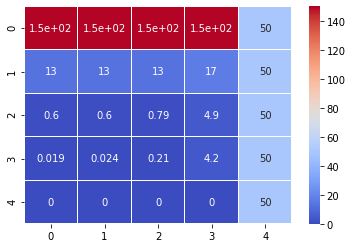

In [48]:
heatmap = sns.heatmap(copia[-1], annot = True, linewidths=.1,cmap='coolwarm')

In [49]:
# listaplot = []
# listaplot.append(copia[0])
# for i, linha in enumerate(copia):
#     if(i%10==0):
#         listaplot.append(linha)
        
        
# for linha in listaplot:
#     plt.plot(x,linha, '-')
# plt.grid()
# plt.show()

In [18]:
round(copia[10][1][1], 2)

84.67

In [19]:
round(copia[1][1][1], 2)

21.56